In [1]:
import pandas as pd
from project_utils import *
from matplotlib.ticker import AutoMinorLocator, LogLocator


In [2]:
df1 = pd.read_csv('dist_cat.csv')
df2 = pd.read_csv('objects.csv')

In [3]:
df = pd.merge(df1, df2, on='SNR_Name', how='inner')

In [4]:
df = df.drop(columns=['Distance_kpc'])

In [5]:
df.rename(columns={'Literature Dist. (kpc)': 'Distance_kpc'}, inplace=True)
df.to_csv('dist_cat2.csv', index=False)

In [6]:
df = process_raw_distance_cat(df)

In [7]:
df.head()

,#,SNR_Name,Distance_kpc,Method,V_LSR (km/s),References,Revised Dist. (kpc),Galactocentric Dist. (kpc),Object,RA,Dec,Ang_size,radius,pm_thresh,Distance_Info,median_dist,median_dist_error
0,6,G1.9+0.3,8.5,GC,L,5,8.34±0.16,0.28,G001.9+00.3,267.187500,-27.166667,1.5,2.25,20,H I absorption gives <10 kpc.,8.5,1.7
1,25,G15.4+0.1,9.3±1.3,Kinematic distance,95,18,9.8±1.3,2.8±0.8,G015.4+00.1,274.508333,-15.450000,15.0,22.50,20,H I observations suggest 4.8 kpc.,9.3,1.3
2,26,G15.9+0.2,11.5±4.5,Kinematic distance,L,19,L,4.2±3.8,G015.9+00.2,274.716667,-15.033333,7.0,10.50,20,H I absorption suggests 7 to 16 kpc.,11.5,4.5
3,28,G16.7+0.1,14,Kinematic distance,20,19,13.9±0.4,6.4±0.4,G016.7+00.1,275.233333,-14.333333,4.0,6.00,20,H I absorption suggests about 14 kpc.,14.0,2.8
4,34,G18.8+0.3,13.8±0.4,Kinematic distance,21.35,22,L,6.5±0.4,G018.8+00.3,275.991667,-12.383333,17.0,25.50,20,Association with molecular cloud suggests 12 k...,13.8,0.4


In [8]:
df_new,dfs = make_catalogue(df,load=True)

In [9]:
dfs

[              source_id          ra       dec  parallax  parallax_error  \
 0   4255905981507987328  278.521285 -6.973591  0.401438        0.016385   
 1   4255911341626924672  278.619523 -6.956738  0.392563        0.016030   
 2   4255913467615157248  278.723049 -6.888799  0.380567        0.018667   
 3   4255917457660413312  278.610067 -6.826546  0.401694        0.018665   
 4   4255920648801826048  278.213626 -6.955294  0.399553        0.014839   
 5   4255921649548738176  278.365289 -6.915946  0.390509        0.015200   
 6   4255925630964363520  278.140683 -6.839353  0.406218        0.019109   
 7   4255933808582438272  278.290295 -6.740548  0.389936        0.017737   
 8   4255942127953376640  278.719564 -6.732024  0.406506        0.018534   
 9   4255955837489154688  278.559243 -6.661579  0.390398        0.019074   
 10  4255956009287870976  278.553903 -6.633000  0.400128        0.018233   
 11  4255974666627158272  278.184642 -6.745430  0.376922        0.016691   
 12  4255983

In [10]:
df_new

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,pm,phot_g_mean_mag,radial_velocity,Object,median_dist,median_dist_error,dist_pc,pm_km_s,total_vel
0,4255905981507987328,278.521285,-6.973591,0.401438,0.016385,-0.837436,-1.368805,1.604658,12.757184,NaN,G024.7+00.6,3.5,0.2,2491.047162,18.947097,NaN
1,4255911341626924672,278.619523,-6.956738,0.392563,0.016030,0.578886,-0.151297,0.598331,13.489327,-22.488592,G024.7+00.6,3.5,0.2,2547.360436,7.224535,23.620556
2,4255913467615157248,278.723049,-6.888799,0.380567,0.018667,-0.300137,-2.473432,2.491576,12.985674,NaN,G024.7+00.6,3.5,0.2,2627.660638,31.032850,NaN
3,4255917457660413312,278.610067,-6.826546,0.401694,0.018665,-0.629268,-3.309133,3.368433,13.939057,59.648163,G024.7+00.6,3.5,0.2,2489.456597,39.747591,71.678270
4,4255920648801826048,278.213626,-6.955294,0.399553,0.014839,0.046556,-3.155024,3.155367,12.009580,23.325130,G024.7+00.6,3.5,0.2,2502.799073,37.432963,44.105424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161066,5356457609853912192,150.963497,-53.137527,0.316442,0.012306,-6.056889,3.909791,7.209187,13.533297,0.118059,G279.0+01.1,2.7,0.3,3160.139825,107.986865,107.986929
161067,5356457747292874752,150.982989,-53.125752,0.489196,0.014265,-10.117764,10.420169,14.524086,13.946637,NaN,G279.0+01.1,2.7,0.3,2044.170017,140.729183,NaN
161068,5356457953451621632,151.144650,-53.149759,0.366861,0.013083,-5.252126,-0.595319,5.285757,13.372089,52.901398,G279.0+01.1,2.7,0.3,2725.830998,68.294307,86.386748
161069,5356457953451623552,151.144443,-53.146183,0.324833,0.014383,-6.107934,3.768476,7.176926,13.802343,26.689970,G279.0+01.1,2.7,0.3,3078.505112,104.726524,108.074046


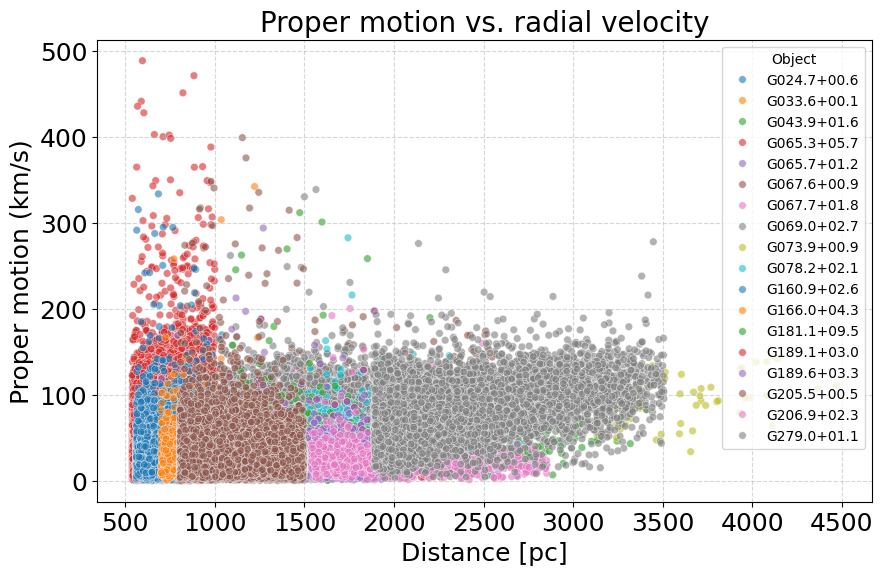

In [11]:
plot_pm_vs_radial_velocity(df_new,median_dist=False)

In [12]:
dfs[0]

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,pm,phot_g_mean_mag,radial_velocity,Object,median_dist,median_dist_error,dist_pc,pm_km_s,total_vel
0,4255905981507987328,278.521285,-6.973591,0.401438,0.016385,-0.837436,-1.368805,1.604658,12.757184,NaN,G024.7+00.6,3.5,0.2,2491.047162,18.947097,NaN
1,4255911341626924672,278.619523,-6.956738,0.392563,0.016030,0.578886,-0.151297,0.598331,13.489327,-22.488592,G024.7+00.6,3.5,0.2,2547.360436,7.224535,23.620556
2,4255913467615157248,278.723049,-6.888799,0.380567,0.018667,-0.300137,-2.473432,2.491576,12.985674,NaN,G024.7+00.6,3.5,0.2,2627.660638,31.032850,NaN
3,4255917457660413312,278.610067,-6.826546,0.401694,0.018665,-0.629268,-3.309133,3.368433,13.939057,59.648163,G024.7+00.6,3.5,0.2,2489.456597,39.747591,71.678270
4,4255920648801826048,278.213626,-6.955294,0.399553,0.014839,0.046556,-3.155024,3.155367,12.009580,23.325130,G024.7+00.6,3.5,0.2,2502.799073,37.432963,44.105424
5,4255921649548738176,278.365289,-6.915946,0.390509,0.015200,-0.367298,-2.543562,2.569945,13.100925,NaN,G024.7+00.6,3.5,0.2,2560.757428,31.193966,NaN
6,4255925630964363520,278.140683,-6.839353,0.406218,0.019109,-0.344033,-0.694604,0.775134,13.970936,-13.164146,G024.7+00.6,3.5,0.2,2461.733634,9.044747,15.971919
7,4255933808582438272,278.290295,-6.740548,0.389936,0.017737,-1.056667,-4.714072,4.831048,13.838423,29.867739,G024.7+00.6,3.5,0.2,2564.523227,58.725441,65.884439
8,4255942127953376640,278.719564,-6.732024,0.406506,0.018534,1.398527,-3.692311,3.948296,13.862142,2.948181,G024.7+00.6,3.5,0.2,2459.985624,46.038439,46.132740
9,4255955837489154688,278.559243,-6.661579,0.390398,0.019074,0.989902,-1.128161,1.500884,14.032864,20.598536,G024.7+00.6,3.5,0.2,2561.490678,18.222928,27.502269


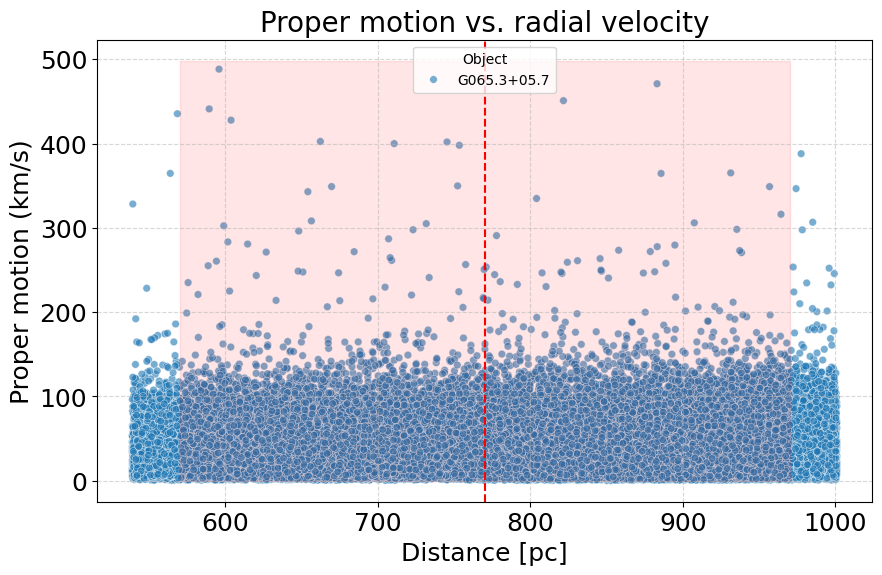

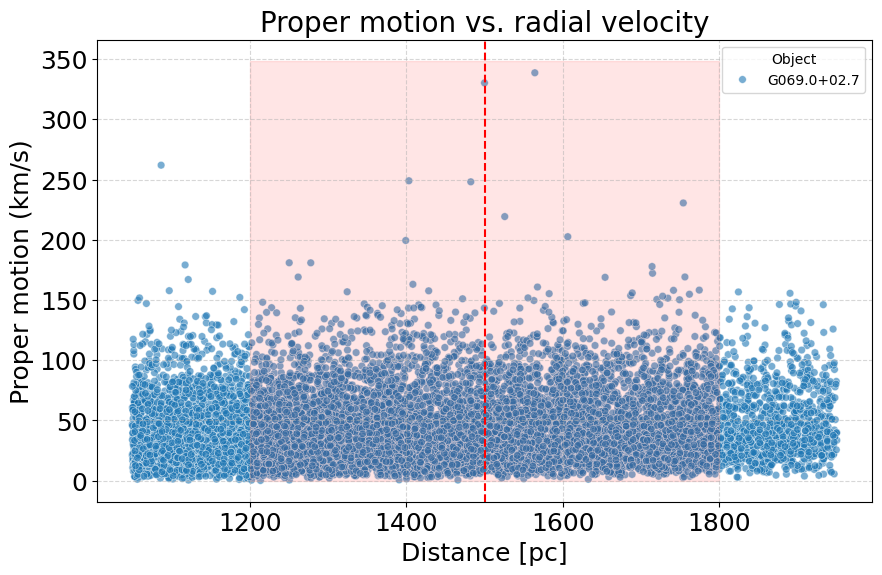

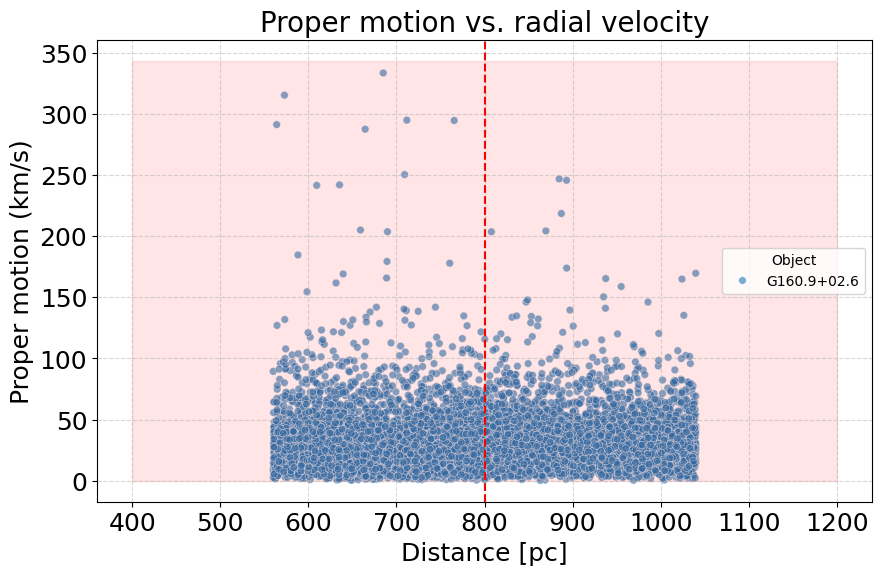

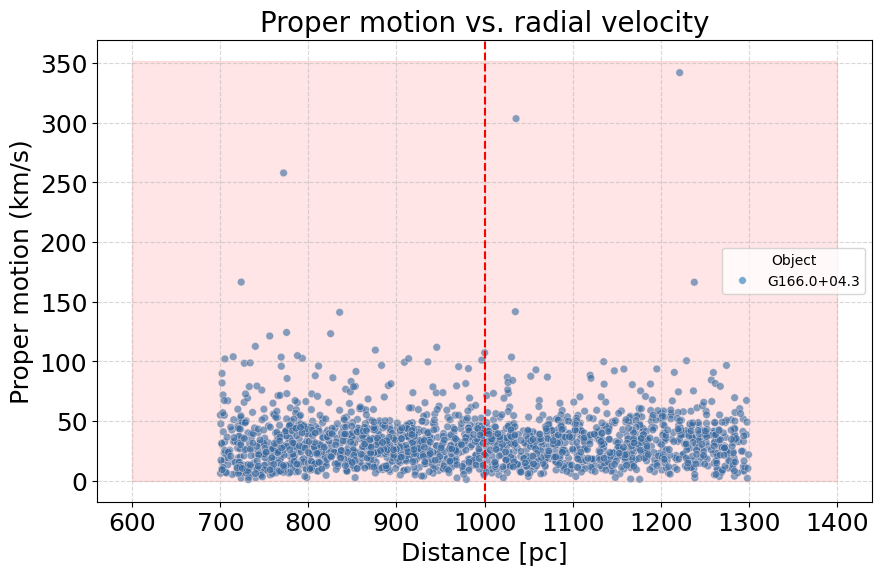

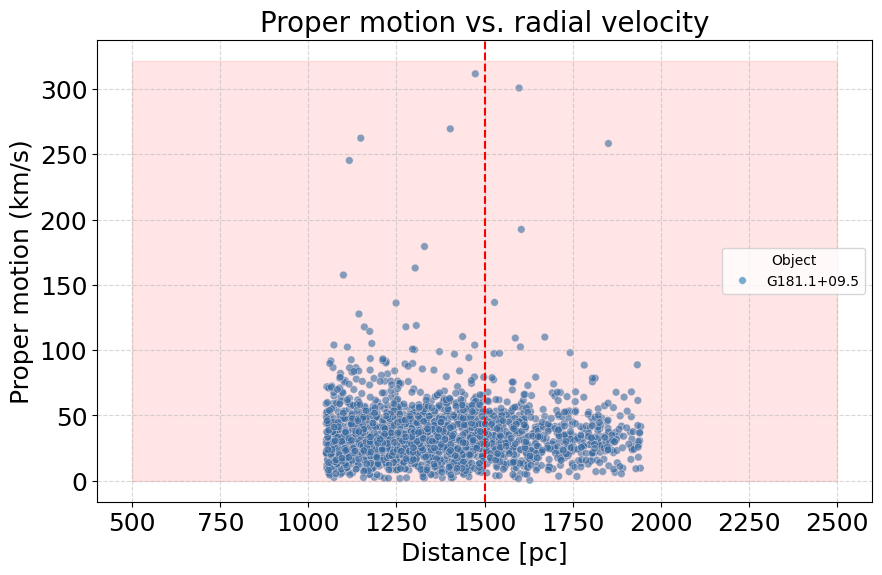

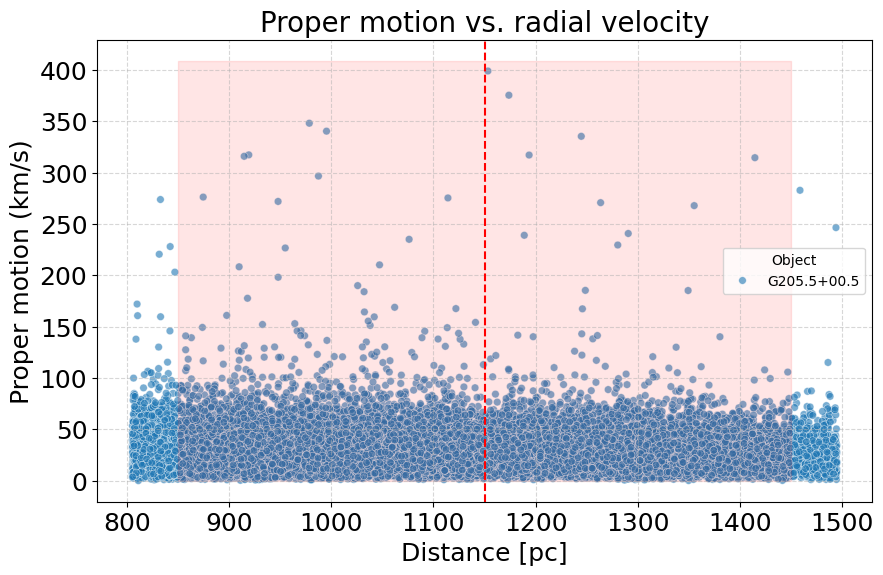

In [13]:
for df_t in dfs:
    if len(df_t[df_t["pm_km_s"] > 300]) > 0:
        plot_pm_vs_radial_velocity(df_t,median_dist=True)

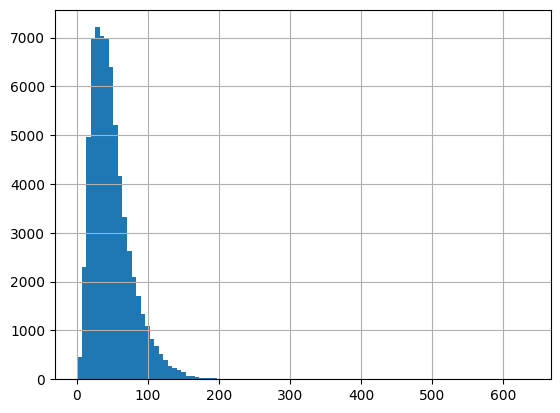

In [14]:
df_new["total_vel"].hist(bins=100)

plt.show()

In [15]:
df_new.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,pm,phot_g_mean_mag,radial_velocity,Object,median_dist,median_dist_error,dist_pc,pm_km_s,total_vel
0,4255905981507987328,278.521285,-6.973591,0.401438,0.016385,-0.837436,-1.368805,1.604658,12.757184,NaN,G024.7+00.6,3.5,0.2,2491.047162,18.947097,NaN
1,4255911341626924672,278.619523,-6.956738,0.392563,0.016030,0.578886,-0.151297,0.598331,13.489327,-22.488592,G024.7+00.6,3.5,0.2,2547.360436,7.224535,23.620556
2,4255913467615157248,278.723049,-6.888799,0.380567,0.018667,-0.300137,-2.473432,2.491576,12.985674,NaN,G024.7+00.6,3.5,0.2,2627.660638,31.032850,NaN
3,4255917457660413312,278.610067,-6.826546,0.401694,0.018665,-0.629268,-3.309133,3.368433,13.939057,59.648163,G024.7+00.6,3.5,0.2,2489.456597,39.747591,71.678270
4,4255920648801826048,278.213626,-6.955294,0.399553,0.014839,0.046556,-3.155024,3.155367,12.009580,23.325130,G024.7+00.6,3.5,0.2,2502.799073,37.432963,44.105424


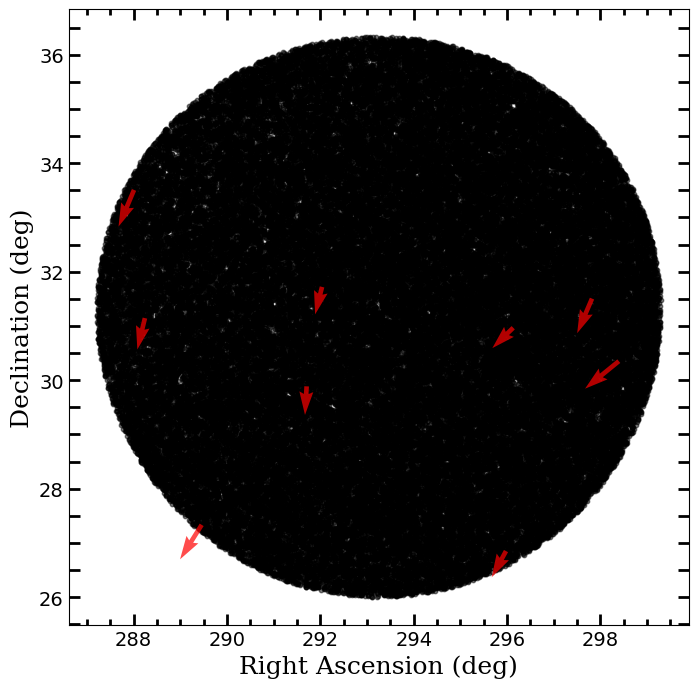

In [ ]:

def plot_radec(r, plot_pm_dir=None):
    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax1.scatter(r["ra"], r["dec"], s=10, alpha=0.5, color='black') 

    if plot_pm_dir:
        mask = r["pm_km_s"] > plot_pm_dir
        pm_ra_deg = r["pmra"][mask]
        pm_dec_deg = r["pmdec"][mask]
        ax1.quiver(
            r["ra"][mask], r["dec"][mask], 
            pm_ra_deg, pm_dec_deg, 
            angles="xy", color="red", alpha=0.7
        )

        #Plot the one with the highest proper motion
        max_idx = r["pm_km_s"].idxmax()
        ax1.quiver(
            r["ra"][max_idx], r["dec"][max_idx], 
            r["pmra"][max_idx], r["pmdec"][max_idx], 
            angles="xy", color="blue", alpha=0.7
        )


    ax1.set_xlabel(r"Right Ascension (deg)", fontfamily="serif", fontsize=18)
    ax1.set_ylabel(r"Declination (deg)", fontfamily="serif", fontsize=18)
    ax1.tick_params(axis='both', right=True, top=True, width=2, length=8, direction='in', which='both', labelsize=14) 
    ax1.tick_params(axis='x', which='minor', length=4, width=2, direction='in') 
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())

    plt.show()

g065 = dfs[3]
plot_radec(g065,plot_pm_dir=400)